In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [ ]:
#%% Converting between color spaces - BGR to HSV - Part II
# HSV colorspace
img = cv2.imread(os.path.join('chips.png'), cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
h, s, v = cv2.split(hsv)
while 0xFF & cv2.waitKey(1) != ord('q'):
    cv2.imshow('img', img)
    cv2.imshow('hsv', hsv)
    cv2.imshow('h', h)
    cv2.imshow('s', s)
    cv2.imshow('v', cv2.normalize(v.astype('float'), None, 1, 0, cv2.NORM_MINMAX))

cv2.destroyAllWindows()

#%%
plt.figure(figsize=(16,9))
plt.hist(h.ravel(), 256, [0, 256], histtype='step', linestyle=('solid'), color=('black'))
plt.hist(s.ravel(), 256, [0, 256], histtype='step', linestyle=('solid'), color=('blue' ))
plt.legend(['Hue', 'Saturation'])
plt.show()

In [ ]:
#plot
def plotImages(images):
        _, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
        for i in range(len(images)):
                ax[i].imshow(images[i], cmap='gray')
        plt.show()


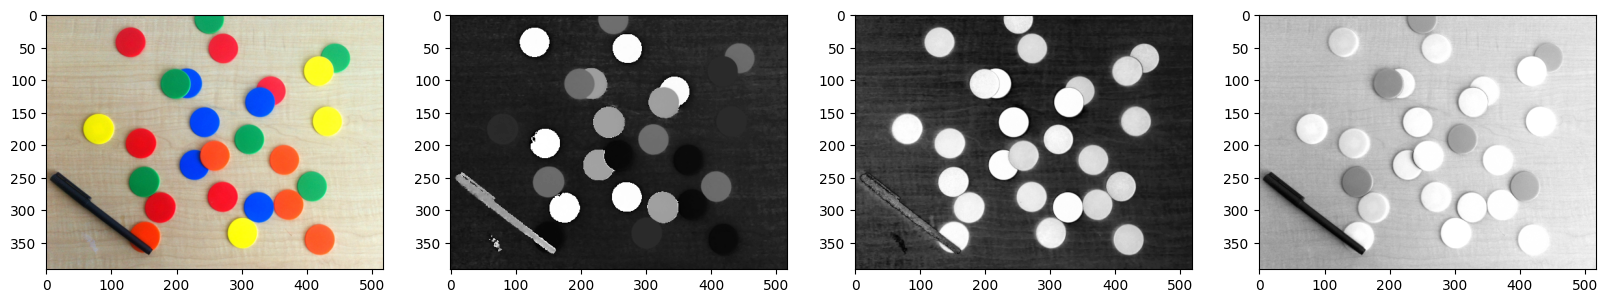

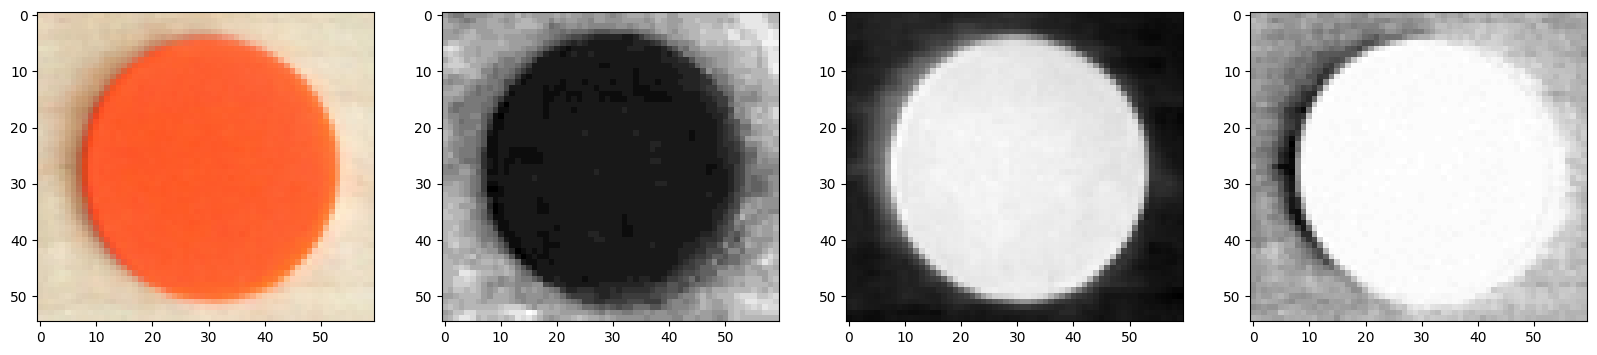

In [ ]:

chips = cv2.imread("chips.png")
chips_crop = chips[318:373,390:450]

rgb_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2RGB)
hsv_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2HSV)

rgb_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2RGB)
hsv_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2HSV)

ch1, ch2, ch3 = cv2.split(hsv_chips)
cr1, cr2, cr3 = cv2.split(hsv_crop)

result_chips = [rgb_chips, ch1, ch2, ch3]
result_crop = [rgb_crop, cr1, cr2, cr3]

plotImages(result_chips)
plotImages(result_crop)


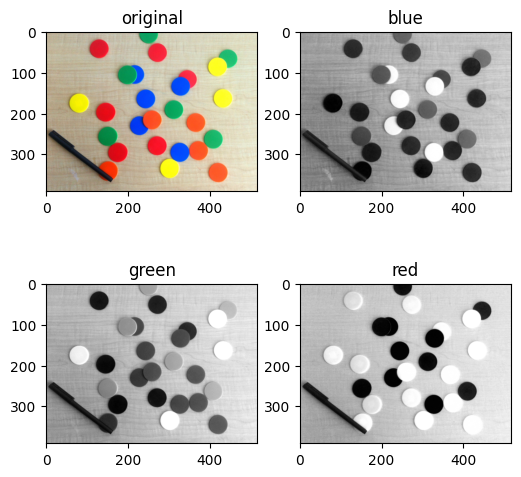

In [ ]:
#RGB
img = cv2.imread("chips.png")

#Separa os canais da imagem
bgr = cv2.split(img)

img_plot = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #-> convertido pois os plots serao em plt, BGR -> RGB

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img_plot) #plot imagem original

plt.subplot(222);
plt.title("blue");
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223);
plt.title("green");
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224);
plt.title("red");
plt.imshow(bgr[2], cmap='gray')

plt.show()

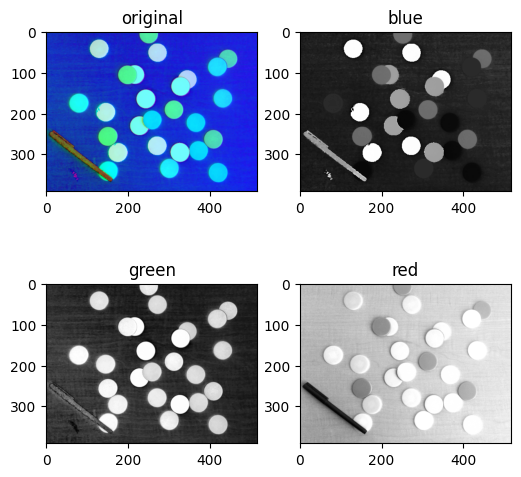

In [ ]:
#HSV

img = cv2.imread("chips.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222);
plt.title("blue");
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223);
plt.title("green");
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224);
plt.title("red");
plt.imshow(bgr[2], cmap='gray')

plt.show()



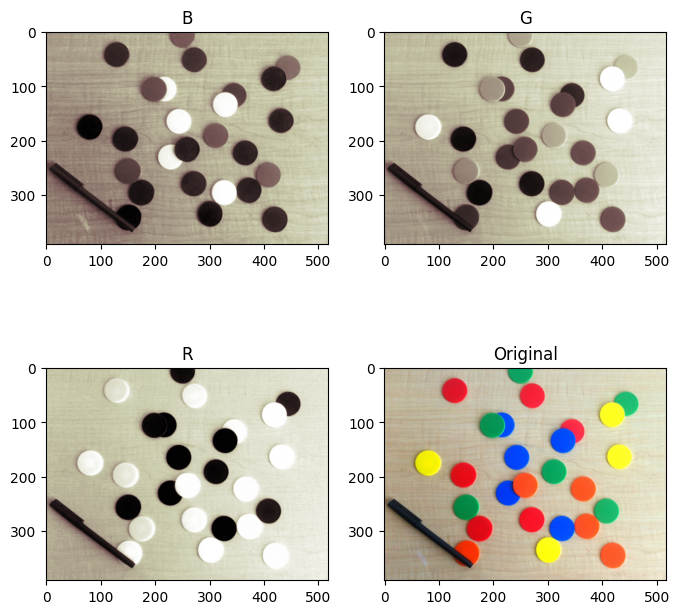

In [ ]:
#%% Load a color image and visualize each channel separately
img = cv2.imread('chips.png', cv2.IMREAD_COLOR)
bgr = cv2.split(img)
#colormap = cv2.COLORMAP_JET
colormap = 1

plt.figure(figsize=(8,8))
plt.subplot(221); plt.title('B'); plt.imshow(cv2.applyColorMap(bgr[0], colormap))
plt.subplot(222); plt.title('G'); plt.imshow(cv2.applyColorMap(bgr[1], colormap))
plt.subplot(223); plt.title('R'); plt.imshow(cv2.applyColorMap(bgr[2], colormap))
plt.subplot(224); plt.title('Original'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
def bgr2hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

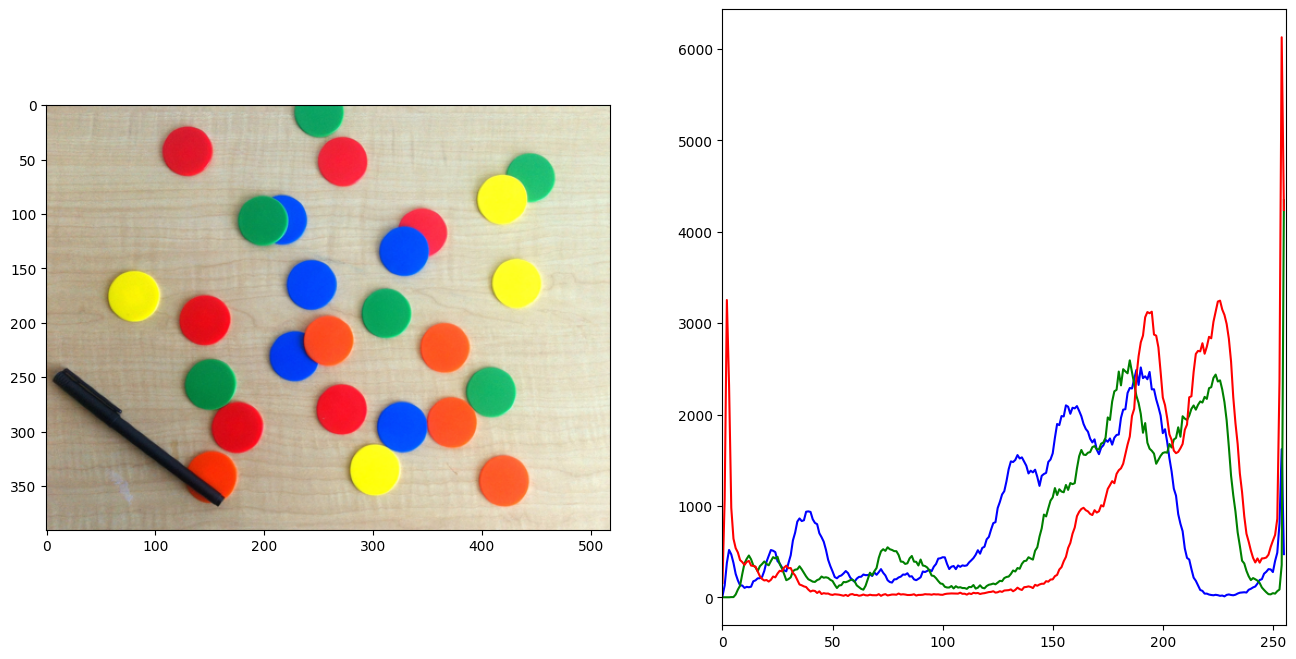

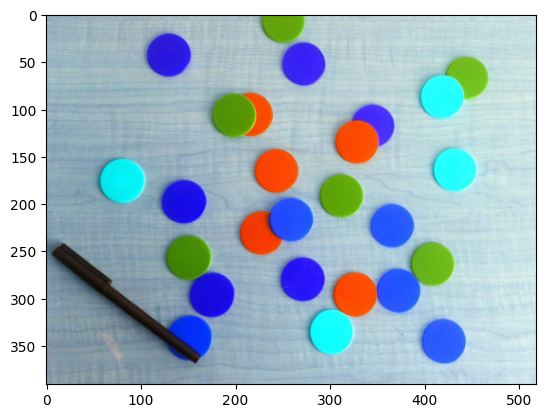

In [ ]:
#Histograma RGB
imfile = 'chips.png'
img = cv2.imread(imfile, cv2.IMREAD_COLOR)

color = ('b', 'g', 'r')

plt.figure(figsize=(16,8))
plt.subplot(121), plt.imshow(bgr2rgb(img))
plt.subplot(122)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

plt.imshow(img)


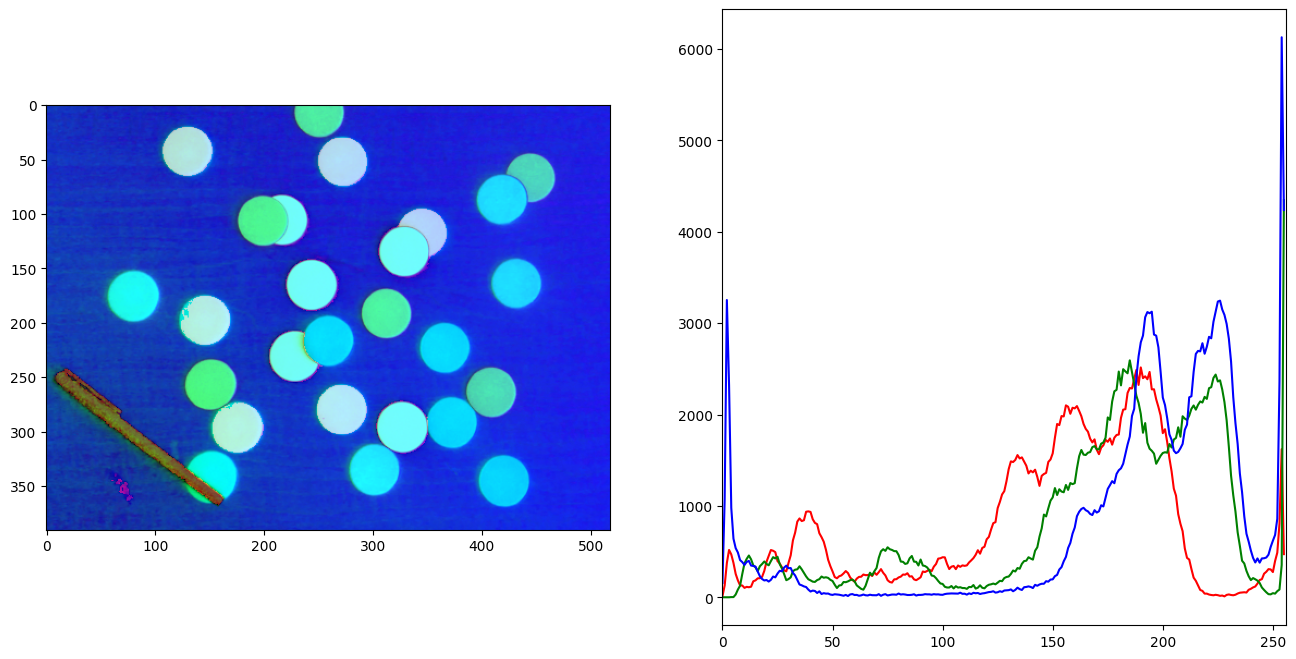

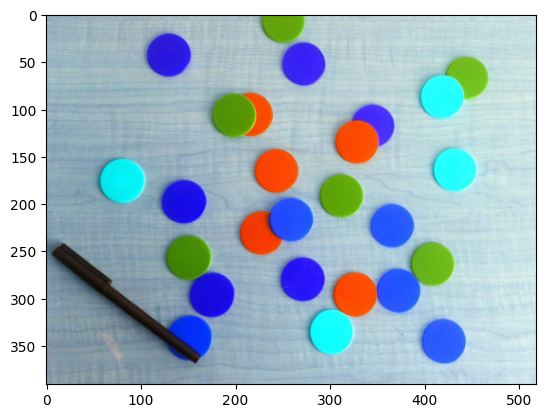

In [ ]:
imfile = 'chips.png'
img = cv2.imread(imfile, cv2.IMREAD_COLOR)
color = ('r', 'g', 'b')

plt.figure(figsize=(16,8))
plt.subplot(121), plt.imshow(bgr2hsv(img))
plt.subplot(122)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

plt.imshow(img)



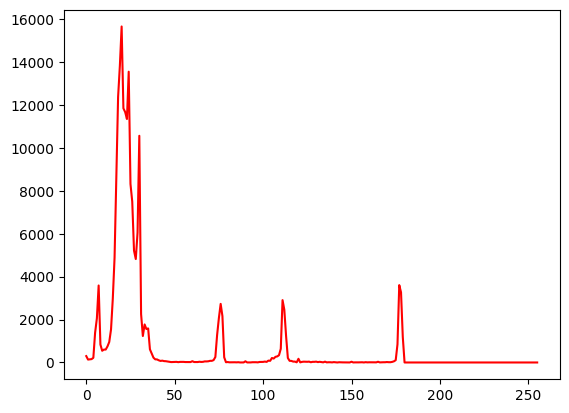

In [ ]:
#Plotando canais HSV
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
#hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
#hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="hue")

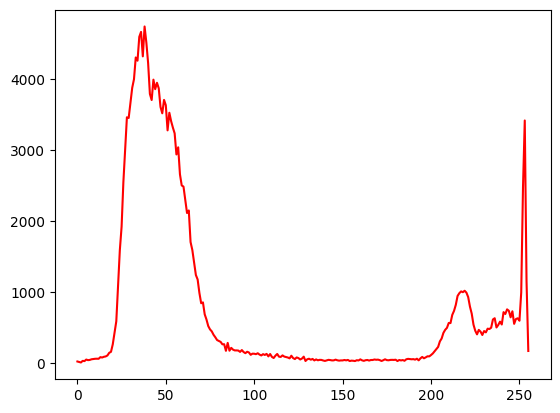

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
#hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
#hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_s, color='r', label="hue")

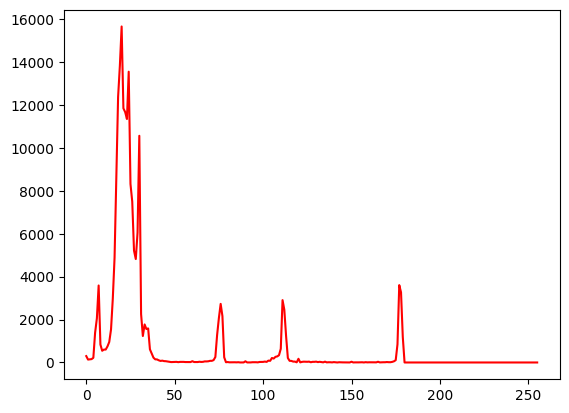

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
#hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
#hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="hue")